<img style="float: left; margin: 110px 30px 30px 30px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 

FLORES OROZCO, OSCAR ALFONSO.

PANIAGUA GARCÍA DE LEÓN, IVÁN

**Fecha:** 05 de marzo del 2020.

**Expedientes** :  710183 y 709025

**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 9 y 10

https://github.com/oscaralfonso17/Tarea6_IPaniagua_OAFlores

### Ejercicio 1:

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
>   
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Demostrar que:

\begin{align*} 
P(k+1)&=\frac{\lambda}{k+1}P(k):\\
\end{align*}

<font color ='red'>

\begin{align*}
\frac{P(k+1)}{P(k)} &= \frac{\frac{\lambda}{k+1} · \frac{e^{-\lambda}(\lambda)^k}{k!}}{\frac{e^{-\lambda}\lambda^k}{k!}} \\
\frac{P(k+1)}{P(k)} &= \frac{\frac{e^{-\lambda}\lambda^k · \lambda}{(k+1) ·k!}}{\frac{e^{-\lambda}\lambda^k}{k!}} \\
\frac{P(k+1)}{P(k)} &= \frac{e^{-\lambda} · \lambda^{{k+1}} · k!}{(k+1)! · e^{\lambda} · \lambda^k} \\
\frac{P(k+1)}{P(k)} &= \frac{\lambda^{k+1-k}· k!}{(k+1)· k!} \\
\frac{P(k+1)}{P(k)} &= \frac{\lambda}{(k+1)} \\
P(k+1) &= \frac{\lambda}{(k+1)}· P(k)
\end{align*}<font>

##### Una vez demostrada la ecuación, vamos a generar variables aletorias que distribuyen poisson usando el método de la transformada inversa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: center; text-align: center; justify-content: center; } </style> """))

In [2]:
def Poisson(k,l): #lambda y k, para coincidir con la demostracion
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def poi(i):
        global Pr
        x  = (l)/(i+1)
        Pr[i+1]=(x*Pr[i])    
    [poi(i) for i in range(k-1)]
    return np.cumsum(Pr)

In [3]:
l = 4
k = 20
n=10000

func_poisson = Poisson(k,l)

random = np.random.rand(n)

In [4]:
font = {'family': 'serif',
        'color':  'C7',
        'weight': 'normal',
        'size': 16,
        }

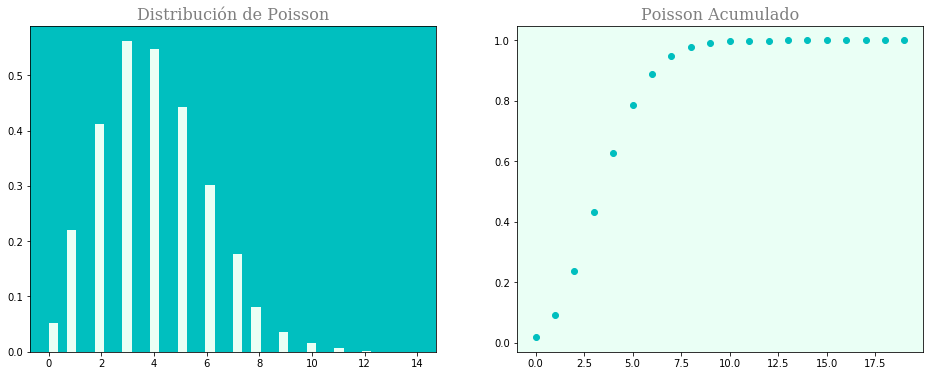

In [5]:
PoissonDistribucion = list(map(lambda j:sum(1 for i in func_poisson if i<random[j]),range(n)))

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (16,6))

#Plot1: Poisson
ax1.set_title("Distribución de Poisson", fontdict= font)
ax1.set_facecolor("c")
ax1.hist(PoissonDistribucion,bins=40,density=True, color = "#eafff5")

#Plot2: Poisson Accumulated
ax2.set_title("Poisson Acumulado", fontdict= font)
ax2.set_facecolor("#eafff5")
ax2.plot(func_poisson,"o", color = "c", label = "acum")
plt.show()

***
***
### Ejercicio 2:

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [6]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##### Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
##### $$f(x)=30(x^2-2x^3+x^4)$$
##### Responda los siguientes literales:
##### 1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [7]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    dentro=0
    dentro = sum([dentro+1 for i in range (len(R1)) if  condition[i]])
    porc=dentro/len(R1)
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    
    plt.show()
    
    print("Dentro son", dentro, "de", len(R1), ", es decir un porcentaje de puntos de aceptación de:",porc)

El máximo de f es: [1.875]


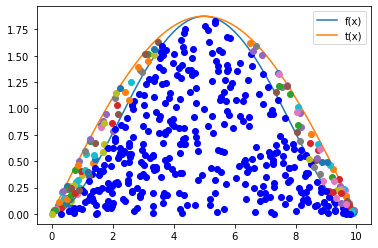

Dentro son 357 de 500 , es decir un porcentaje de puntos de aceptación de: 0.714


In [9]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) senoidal
b=0
c=10

# Función objetivo 
f = lambda x:30*((x/c)**2-2*(x/c)**3+(x/c)**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función senoidal
t = lambda x: a*np.sin(np.pi*(x/c)*np.ones(len(x))) # función senoidal
tconst= lambda x: a*np.ones(len(x)) # función constante

intervalos=0.01
x = np.arange(b,c,intervalos)  # Rango donde se graficará las funciones
print('El máximo de f es:',a)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) con función senoidal genero valores aleatorios U~(a,b)
R2 = np.random.rand(N)
R1 = np.random.uniform(b,c,N)

Acep_rechazo(R2,R1,f,t)

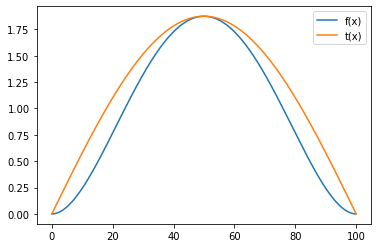

In [10]:
b=0
c=100
intervalos=0.01
N=200
R2 = np.random.rand(N)
R1 = np.random.uniform(b,c,N)
x = np.arange(b,c,intervalos)

# Función objetivo 
f = lambda x:30*((x/c)**2-2*(x/c)**3+(x/c)**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función senoidal
t = lambda x: a*np.sin(np.pi*(x/c)*np.ones(len(x))) # función senoidal

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.show()

##### 2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

<font color ='red'> Para encontrar la función de densidad, hay que integrar: 

\begin{align*}
t(x) &= a · sin(\pi x)
\end{align*}

\begin{align*}
donde: 
a = max(f(x))
\end{align*}

\begin{align*}
\int_{0}^{1} t(x)dx \rightarrow
\int_{0}^{1} a · sin(\pi x)
\end{align*}
ya que el máximo es una constante...
\begin{align*}
i &= max(f(x)) \int_{0}^{1} sin(\pi x) \\
i &= max(f(x)) · - (\frac{cos(\pi x)}{\pi})|_0^1 \\
\end{align*}
evaluamos de 0 a 1...
\begin{align*}
i &= max(f(x)) · - (\frac{cos(\pi · 1)}{\pi}) - (- (\frac{cos(\pi · 0)}{\pi})) \\
i &= max(f(x)) ·- (-\frac{1}{\pi} - (- \frac{1}{\pi})) \\
i &= max(f(x)) · (\frac{1}{\pi} + \frac{1}{\pi}) \\
i &= \frac{2}{\pi} · max(f(x))
\end{align*}

por lo que...
\begin{align*}
g(x) &= \frac{h(x)}{c} \\
g(x) &= \frac{max(fx)) · sin(\pi x)}{\frac{2}{\pi} · max(f(x))} \\
\end{align*}<font>

    

<font color ='blue'>
\begin{align*}
g(x) &= \frac{\pi · sin(\pi x)}{2}
\end{align*}<font>

##### 3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

<font color = red> Nuestra función $g(x)$ es:
\begin{align*}
g(x) = \frac{\pi · sin(\pi x)}{2}
\end{align*}<font>

Para obtener $G(x)$ aplicamos el método de la transformada inversa (integral de $g(x)$)

\begin{align*}
G(x) &= \int_0^x g(x) · dx \\ 
G(x) &= \int_0^x\frac{\pi · sin(\pi x)}{2} \\
G(x) &= \frac{\pi}{2} \int_0^x sin(\pi x) \\
G(x) &= -\frac{1}{2} · cos(\pi x) |_0^x \\
\end{align*}
evaluamos de 0 a x...
\begin{align*}
G(x) &= -\frac{1}{2} · (cos(\pi · x) - cos(\pi ·0)) \\
G(x) &= \frac{1-cos(\pi x)}{2} = U
\end{align*}
y despejamos para x: 
<font color ='blue'>
\begin{align*}
x = \frac{cos^{-1}(1-2 U)}{\pi}
\end{align*}<font>

##### 4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:

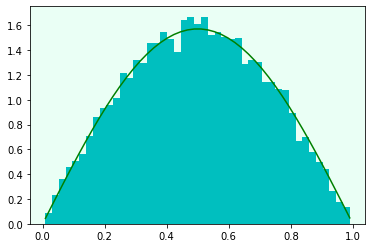

In [11]:
n = 10000
x_lambda = lambda u: (np.arccos(1-2*u))/np.pi
gx = lambda x: (np.pi/2)*np.sin(np.pi*x)
U = np.random.uniform(0,1,n)
x = x_lambda(U)

fig,(ax1) = plt.subplots(1,1, figsize = (6,4))
count, xx, _ = plt.hist(x,bins=45,density=True, color="c")
ax1.set_facecolor("#eafff5")
ax1.plot(xx,gx(xx),"g")
plt.show()

##### 5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

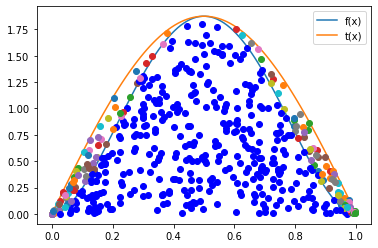

Dentro son 356 de 500 , es decir un porcentaje de puntos de aceptación de: 0.712


In [12]:
# Función objetivo 
f = lambda x: 30*(x**2-2*x**3+x**4)
# Máximo de la función f
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: a*np.sin(np.pi*x)

# Gráficas de las funciones
plt.plot(np.linspace(0,1,100),f(np.linspace(0,1,100)),label="f(x)")
plt.plot(np.linspace(0,1,100),t(np.linspace(0,1,100)),label="t(x)")
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

#### 6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

En el caso de t(x) constante encontramos lo siguiente:


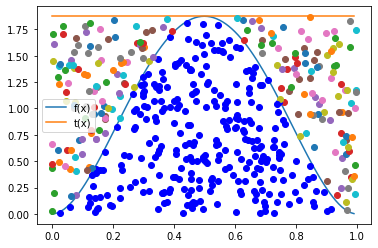

Dentro son 284 de 500 , es decir un porcentaje de puntos de aceptación de: 0.568


In [13]:
print("En el caso de t(x) constante encontramos lo siguiente:")
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,tconst(x),label='t(x)') #tconst esta creada anteriormente
plt.legend()
Acep_rechazo(R2,R1,f,tconst)

En el caso de t(x) senoidal encontramos lo siguiente:


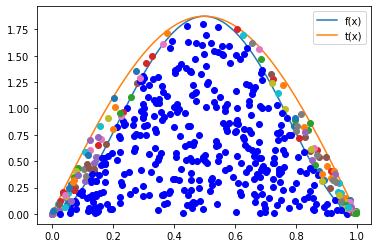

Dentro son 356 de 500 , es decir un porcentaje de puntos de aceptación de: 0.712


In [14]:
print("En el caso de t(x) senoidal encontramos lo siguiente:")
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
Acep_rechazo(R2,R1,f,t)

Como podemos observar, el porcentaje de puntos de aceptación cuando usamos t(x) como una función senoidal fue en gran medida más elevado comparado con dicho porcentaje usando t(x) como constante. Esto se debe a que, la función senoidal que tenemos, se asemeja mucho a la f(x) dada;  gracias a esto, acotamos de gran manera el espacio en el que se puedan estar generando puntos aleatorios fuera de la región acotada por f(x), logrando por ende, elevar el porcentaje de puntos aleatorios generados dentro de nuestra función.

#### 7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
#### $$f(x)=20x(1-x)^3$$ 
#### usando el método de aceptación y rechazo

In [28]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    dentro=0
    dentro = sum([dentro+1 for i in range (len(R1)) if  condition[i]])
    porc=dentro/len(R1)
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    
    plt.show()
    print("Dentro son", dentro, "de", len(R1), ", es decir un porcentaje de puntos de aceptación de:",porc)
    return np.sum(condition)/len(condition),np.multiply(R2,t_x)[np.multiply(R2,t_x)<=f_x]

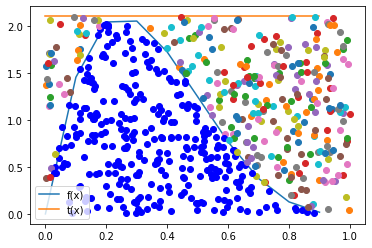

Dentro son 296 de 600 , es decir un porcentaje de puntos de aceptación de: 0.49333333333333335


In [29]:
# Función objetivo 
f2 = lambda x: 20*x*(1-x)**3

# Máximo de la función f
a2 = f2(optimize.fmin(lambda x:-f2(x),0,disp=False))

#funcion constante
t2 = lambda x: a2*np.ones(len(x))

N = 600
x = np.arange(0,1,0.1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

plt.plot(x,f2(x),label='f(x)')
plt.plot(x,t2(x),label='t(x)')
plt.legend(loc='best')

Prob,X = Acep_rechazo(R2,R1,f2,t2)

In [31]:
X[:20]

array([0.12604405, 1.26950801, 0.4068828 , 1.11580176, 0.0432276 ,
       0.39247473, 0.78095705, 1.56986347, 0.24426436, 1.28384939,
       1.68497757, 0.4641782 , 0.74302205, 0.62108163, 0.07908446,
       1.56746663, 0.87438159, 1.05520877, 0.02832334, 0.43684354])